In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras import layers

from keras.datasets import cifar10

import matplotlib.pyplot as plt

import ssl

Split the imported dataset into training and test data. Preprocess (reshape and normalize) the dataset. Print out the shapes of the resulting tensors.

In [2]:
ssl._create_default_https_context = ssl._create_unverified_context
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

print("Training data shape:\n", train_data.shape, "\n")
print("Test data shape:\n", test_data.shape, "\n")
 
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
 
train_data /= 255 
test_data /= 255

train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

print("Training labels shape:\n", train_labels.shape, "\n")
print("Test labels shape:\n", test_labels.shape)


Training data shape:
 (50000, 32, 32, 3) 

Test data shape:
 (10000, 32, 32, 3) 

Training labels shape:
 (50000, 10) 

Test labels shape:
 (10000, 10)


Define the CNN-Autoencoder (CAE) model.

In [3]:
model = keras.Sequential()
 
#1st convolution layer
model.add(layers.Conv2D(16, (3, 3) #16 filters (3x3) 
, padding='same', input_shape=(32,32,3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2), padding='same'))
 
#2nd convolution layer
model.add(layers.Conv2D(2,(3, 3), padding='same')) # 2 filters (3x3)
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2), padding='same')) #Layer mit dem Index 6?
 
#here compressed version
 
#3rd convolution layer
model.add(layers.Conv2D(2,(3, 3), padding='same')) # 2 filters (3x3)
model.add(layers.Activation('relu'))
model.add(layers.UpSampling2D((2, 2)))
 
#4rd convolution layer
model.add(layers.Conv2D(16,(3, 3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.UpSampling2D((2, 2)))
 
model.add(layers.Conv2D(3,(3, 3), padding='same'))
model.add(layers.Activation('sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 activation (Activation)     (None, 32, 32, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 2)         290       
                                                                 
 activation_1 (Activation)   (None, 16, 16, 2)         0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 2)           0         
 g2D)                                                   

Compile and train the previously defined architecture on the preprocessed dataset.

In [4]:
model.compile(optimizer='adadelta', loss='binary_crossentropy')
model.fit(train_data, train_data , batch_size=1, epochs=1, validation_data=(test_data, test_data)) #Selbstreferenzierung von train_data zwei mal, weil die Aufgabe des Autoencoders eine Rekonstruktion der Eingangsdaten ist
#model.save('C:/Users/AL/Desktop/Machine Learning II Thema 2/model_mnist.keras')


50000/50000 [==============================] - 201s 4ms/step - loss: 0.6908 - val_loss: 0.6857


Plot 5 random input-images to be ran through the CAE aswell as the results.

313/313 [==============================] - 3s 10ms/step


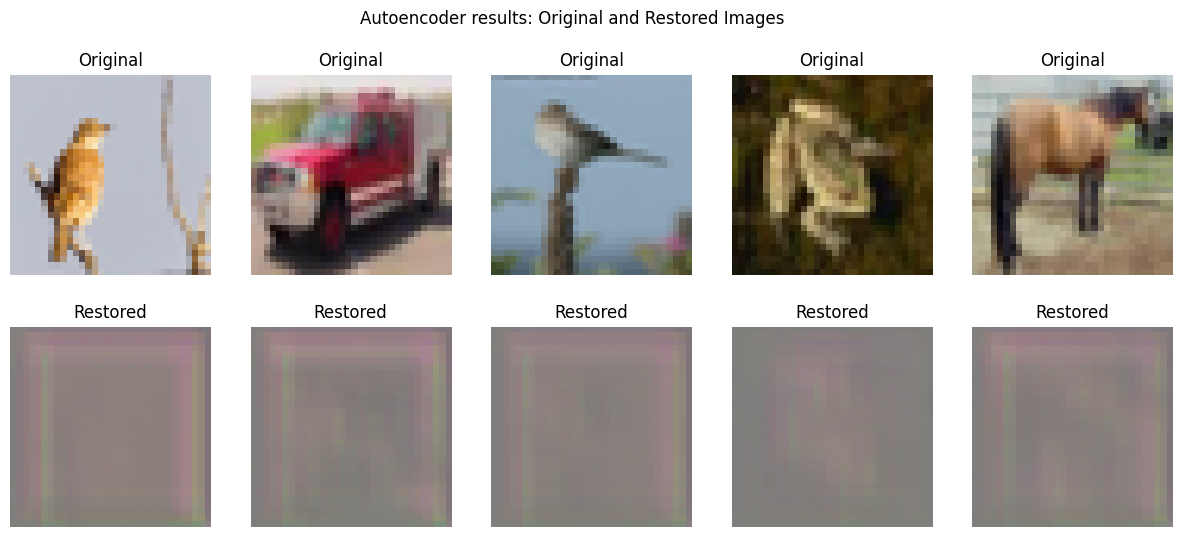

In [5]:
num_samples = test_data.shape[0]
indices = np.arange(num_samples)
np.random.shuffle(indices)

restored_imgs = model.predict(test_data)

# Create a 2x5 grid
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Autoencoder results: Original and Restored Images')

for i in range(5):
    random_index = indices[i]

    # Original images
    axes[0, i].imshow(test_data[random_index])
    axes[0, i].axis('off')  # Hide axes
    axes[0, i].set_title('Original')

    # Restored images
    axes[1, i].imshow(restored_imgs[random_index])
    axes[1, i].axis('off')  # Hide axes
    axes[1, i].set_title('Restored')

plt.show()